# PROJECT - AIR PRESSURE SYSTEM FAULT PREDICTION

* ***Problem statement.***
    * ***The system in focus is the Air Pressure system (APS) which generates pressurized air that are utilized in various functions in a truck, such as braking and gear changes. The datasets positiveclass corresponds to component failures for a specific component of the APS system. The negative class corresponds to trucks with failures for components not related to the APS system.***
    * ***The problem is to reduce the cost due to unnecessary repairs. So it is required to minimize the false predictions.***
    * ***Cost 1 = 10 and Cost 2 = 500***
    * ***The total cost of a prediction model the sum of Cost_1 multiplied by the number of Instances with type 1 failure and Cost_2 with the number of instances with type 2 failure, resulting in aTotal_cost . In this case Cost_1 refers to the cost that an unnessecary check needs to be done by an mechanic at an workshop, while Cost_2 refer to the cost of missing a faulty truck,which may cause a breakdown.***
    * ***Total_cost = Cost_1 * No_Instances + Cost_2 * No_Instances.***
    * ***From the above problem statement we could observe that, we have to reduce false positives and false negatives. More importantly we have to reduce false negatives, since cost incurreddue to false negative is 50 times higher than the false positives.***
    
|True class|Positive|Negative||
|----------|--------|--------||
|<b>Predicted class</b>||| |
| Positive|-|cost_1||
| Negative   | cost_2        |  | |

In [26]:
# importing necessary libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.preprocessing import RobustScaler


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix
from imblearn.combine import SMOTETomek

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [2]:
# reading the data 
df = pd.read_csv('G://Learning//MACHINE LEARNING//DATA//aps_data.csv', na_values="na")

In [3]:
# checking rows and columns of the dataset
df.shape

(36188, 171)

In [4]:
df['class'].value_counts()

neg    35188
pos     1000
Name: class, dtype: int64

In [5]:
df = df.sample(3000)

In [6]:
# Check unique values of target varaible
df['class'].value_counts()


neg    2920
pos      80
Name: class, dtype: int64

In [7]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 170 numerical features : ['aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000', 'cc_000', 'cd_000', 'ce_000', 'cf_000', 'cg_000', 'ch_000', 'ci_000', 'cj_000', 'ck_000'

* ***As this is sensor data.Interpretation of the data is not required***

In [8]:
df['class'].isnull().sum()

0

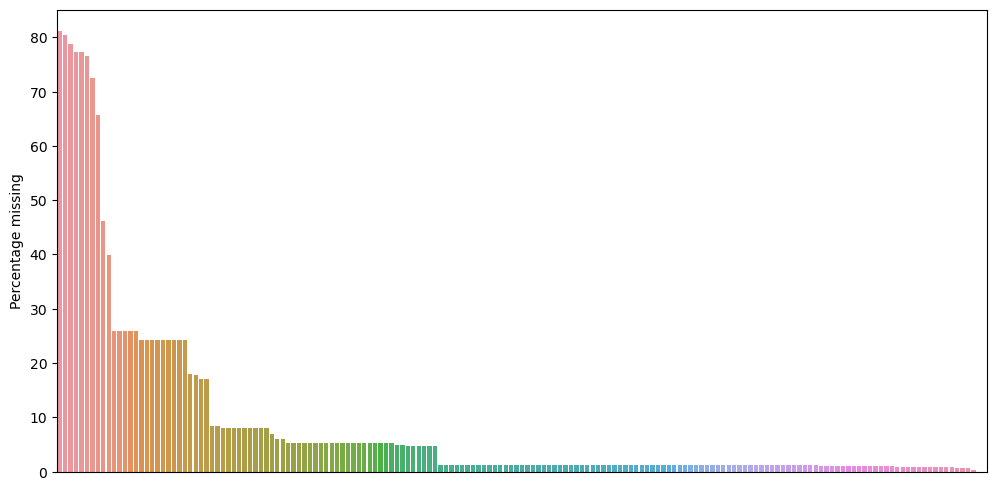

In [9]:
# Plotting Missing values percentage for each column
missing = (((df.isnull().sum()/df.shape[0])*100).sort_values(ascending=False)).to_frame()
plt.figure(figsize=(12,6))
sns.barplot(x=missing.index,y=missing.values.T[0])
plt.xticks([])
plt.ylabel("Percentage missing")
plt.show()

In [10]:
## Dropping columns which has more than 70% of missing values
dropcols = missing[missing[0]>70]
dropcols

,0
br_000,81.066667
bq_000,80.366667
bp_000,78.733333
ab_000,77.366667
cr_000,77.366667
bo_000,76.500000
bn_000,72.566667


In [11]:
df.drop(list(dropcols.index), axis=1, inplace=True)
df.shape

(3000, 164)

* ***we have sucessfully drop those columns which has more than 70% of missing values***

In [12]:
missing_values_count= df.isnull().sum()
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()
print(f"Percentage of total missing cells in the data {round((total_missing/total_cells) * 100)}%.")

Percentage of total missing cells in the data 6%.


Positive: 80, Negative: 2920


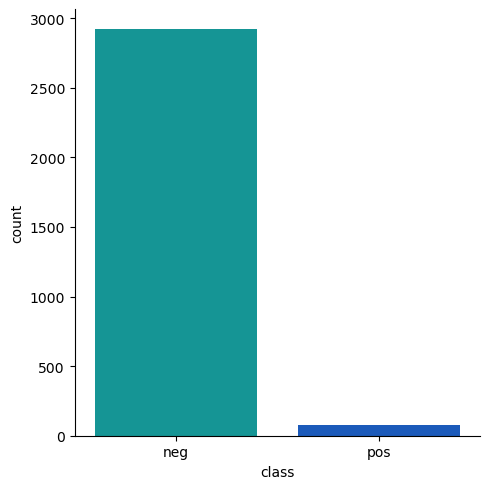

In [13]:
# Visualization of unique values in Target variable
pos = df[df['class']=='pos'].shape[0]
neg = df[df['class']=='neg'].shape[0]
print("Positive: " + str(pos) + ", Negative: " + str(neg))
sns.catplot(data=df, x="class", kind="count", palette="winter_r")
plt.show()


* ***Report:***
    * ***The target classes are highly imbalanced***
    * ***Class imbalance is a scenario that arises when we have unequal distribution of class in a dataset i.e. the no. of data points in the negative class (majority class) very large compared to that ofthe positive class (minority class)***
    * ***If the imbalanced data is not treated beforehand, then this will degrade the performance of the classifier model.***
    * ***Hence we should handle imbalanced data with certain methods.***
* ***How to handle Imbalance Data:***
    * ***Resampling data is one of the most commonly preferred approaches to deal with an imbalanced dataset. There are broadly two types of methods for this i) Undersampling ii) Oversampling. Inmost cases, oversampling is preferred over undersampling techniques. The reason being, in undersampling we tend to remove instances from data that may be carrying some importantinformation.***
    * ***SMOTE(Synthetic Minority Oversampling Technique) is an oversampling technique where the synthetic samples are generated for the minority class.***
    * ***Hybridization techniques involve combining both undersampling and oversampling techniques. This is done to optimize the performance of classifier models for the samples created as part of these techniques.It only duplicates the data and it won't add and new information***

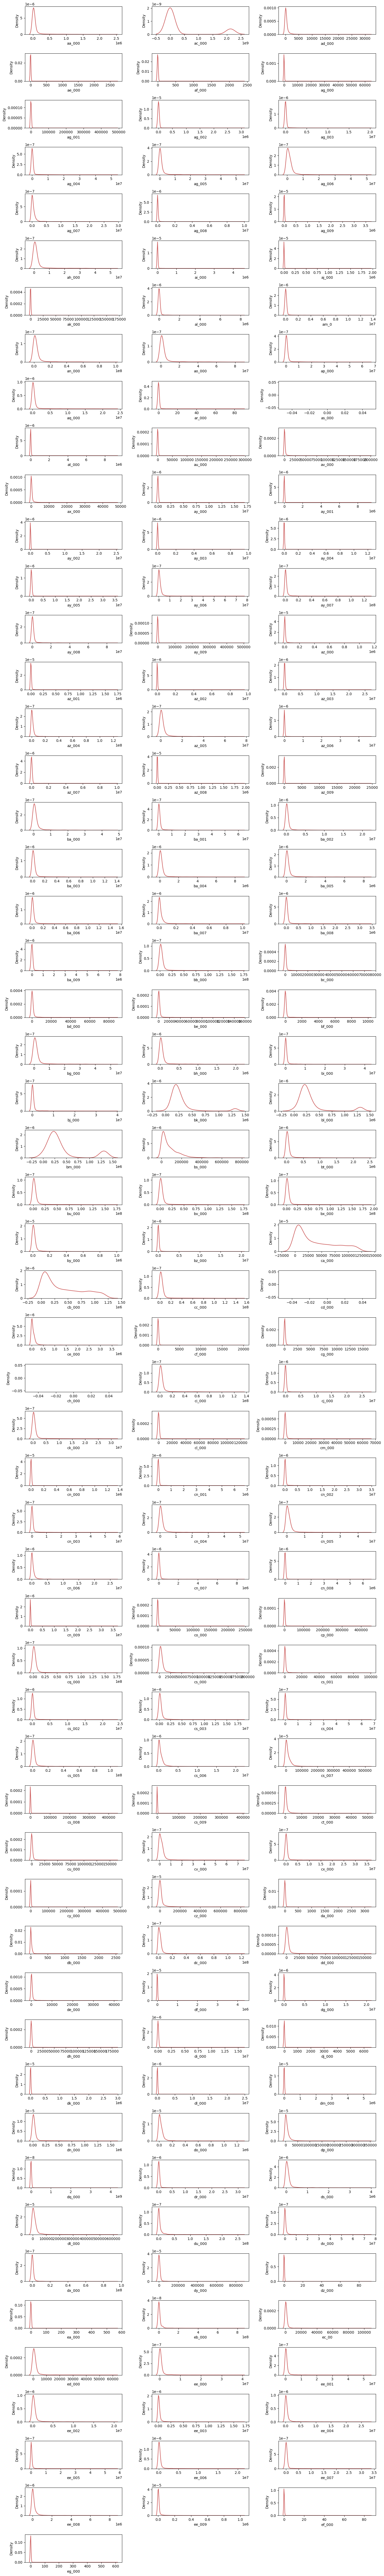

In [14]:
# Plot distribution of all Independent Numerical variables
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

nrows = (df.shape[1]-1)//3+1
ncolumn = 3
plt.figure(figsize=(15,100))
plotnumber = 1
for column in numeric_features:
    ax = plt.subplot(nrows,ncolumn,plotnumber)
    sns.kdeplot(df[column],color='indianred')
    plt.tight_layout()
    plotnumber+=1

* ***Report:***
    * ***As per the above plot most of the features are not normally distributed.***
    * ***Interpreting each and every column is not necessary as this is sensor data.***

# Createing Functions for model training and evaluation


In [15]:
def evaluate_clf(true, predicted):
    '''
    This function takes in true values and predicted values
    Returns: Accuracy, F1-Score, Precision, Recall, Roc-auc Score
    '''
    acc = round(accuracy_score(true, predicted),2)
    f1 = round(f1_score(true, predicted),2)
    precision = round(precision_score(true, predicted),2)
    recall = round(recall_score(true, predicted),2) 
    roc_auc = round(roc_auc_score(true, predicted),2) 
    return acc, f1 , precision, recall, roc_auc

In [16]:
def total_cost(y_true, y_pred):
    '''
    This function takes y_ture, y_predicted, and prints Total cost due to misclassification

    '''
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    cost = 10*fp + 500*fn
    return cost

In [17]:
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

    cost_list=[]
    models_list = []
    accuracy_list = []

    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model
        
        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)
        train_cost = total_cost(y_train, y_train_pred)
        
        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)
        test_cost = total_cost(y_test, y_test_pred)
        
        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])
        
        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1))
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
        print(f'- COST: {train_cost}.')
        print('----------------------------------')
        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        print(f'- COST: {test_cost}.')
        cost_list.append(test_cost)
        print('='*35)
        print('\n')

    report=pd.DataFrame(list(zip(models_list, cost_list)), columns=['Model Name', 'Cost']).sort_values(by=["Cost"])

    return report


# Evaluate Model on Different experiments

***Experiment: 1 = KNN Imputer for Null values***
* ***Why Robust scaler and not Standard scaler?***
    * ***Scaling the data using Robust scaler.***
    * ***Since most of the independent variables are not normally distributed we cannot use Standardscaler***
* ***Why Robust Scaler and not Minmax?***
    * ***because most of the feature has outliers. So Minmax will scale data according to Max values which is outlier.***
    * ***Robust Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range).***
* ***Why KNN Imputer?***
    * ***KNNImputer by scikit-learn is a widely used method to impute missing values. It is widely being observed as a replacement for traditional imputation techniques.***
    * ***KNNImputer helps to impute missing values present in the observations by finding the nearest neighbors with the Euclidean distance matrix.***
    * ***Here we Iterates through different K values and get accuracy and choose best K values.***
* ***Handling Imbalanced data***
    * ***SMOTE+TOMEK is one of such a hybrid technique that aims to clean overlapping data points for each of the classes distributed in sample space.***
    * ***This method combines the SMOTE ability to generate synthetic data for minority class and Tomek Links ability to remove the data that are identified as Tomek links from the majority class***


In [18]:
# spliting independent features and dependent feature
X= df.drop('class', axis=1)
y = df['class']

In [19]:
# Manually Encoding Target Variable
y= y.replace({'pos': 1, 'neg': 0})

In [20]:
# first fit with robust scaler for KNN best K-selection experminet
robustscaler = RobustScaler()
X1 = robustscaler.fit_transform(X)

In [21]:
# Finding the optimal n_neighbour value for KNN imputer
neighbours = [i for i in range(1,6)]
for neighbour in neighbours:
    pipeline = Pipeline(steps=[('knn_imputer',KNNImputer(n_neighbors=neighbour)),('logistic_model',LogisticRegression())])
    scores = cross_val_score(estimator=pipeline,X=X1,y=y,scoring='accuracy',n_jobs=-1)
    print(f'n_neighbour = {neighbour}||accuracy ({round(np.mean(scores),2)}).')

n_neighbour = 1||accuracy (0.7).
n_neighbour = 2||accuracy (0.71).
n_neighbour = 3||accuracy (0.7).
n_neighbour = 4||accuracy (0.71).
n_neighbour = 5||accuracy (0.72).


* ***We can observe that higher n_neighbour value doset not increase accuracy significantly so we will go with n_neighbors=1***

In [22]:
# fit the knn imputer with selected k value
knn_pipeline = Pipeline(steps=[('knn_imputer',KNNImputer(n_neighbors=1)), ('robust_scaler',RobustScaler())])
X = knn_pipeline.fit_transform(X)

In [23]:
from imblearn.combine import SMOTETomek
# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority',n_jobs=-1)
# Fit the model to generate the data.
X_resample, y_resample= smt.fit_resample(X, y)

In [28]:
# Dictionary which contains models for experiment
models = {"Logistic Regression": LogisticRegression(),
          'Support Vector Classifier':SVC(),
          'K-Neighbors Classifier': KNeighborsClassifier(),
          'Naive Bayes Classifier':BernoulliNB(),
          'Decesion Tree':DecisionTreeClassifier(),
          'Random Forest': RandomForestClassifier(),
          'AdaBoost Classifier':AdaBoostClassifier(),
          'GradientBoost Classifier':GradientBoostingClassifier(),
          'Xgboost Classifier':XGBClassifier()
         
         }

In [29]:
report_knn = evaluate_models(X=X_resample,y=y_resample,models=models)

Logistic Regression
Model performance for Training set
- Accuracy: 0.6400
- F1 score: 0.7300
- Precision: 0.5800
- Recall: 0.9800
- Roc Auc Score: 0.6400
- COST: 40850.
----------------------------------
Model performance for Test set
- Accuracy: 0.6400
- F1 score: 0.7300
- Precision: 0.5900
- Recall: 0.9800
- Roc Auc Score: 0.6400
- COST: 10510.


Support Vector Classifier
Model performance for Training set
- Accuracy: 0.6000
- F1 score: 0.3500
- Precision: 0.9300
- Recall: 0.2200
- Roc Auc Score: 0.6000
- COST: 909380.
----------------------------------
Model performance for Test set
- Accuracy: 0.6100
- F1 score: 0.3800
- Precision: 0.9500
- Recall: 0.2400
- Roc Auc Score: 0.6100
- COST: 223570.


K-Neighbors Classifier
Model performance for Training set
- Accuracy: 0.9700
- F1 score: 0.9700
- Precision: 0.9600
- Recall: 0.9800
- Roc Auc Score: 0.9700
- COST: 28880.
----------------------------------
Model performance for Test set
- Accuracy: 0.9600
- F1 score: 0.9600
- Precision: 0

In [30]:
report_knn

,Model Name,Cost
5,Random Forest,70
8,Xgboost Classifier,570
7,GradientBoost Classifier,1060
6,AdaBoost Classifier,2080
4,Decesion Tree,3070
3,Naive Bayes Classifier,6250
2,K-Neighbors Classifier,9340
0,Logistic Regression,10510
1,Support Vector Classifier,223570


* ***Insights:***
    * ***For the Experiment 1: Knn imputer has Random Forest classifier as the best Model***
    * ***Proceeding with further experiments***

***-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------***


***Experiment: 2 = Simple Imputer with Strategy Median***

* ***SimpleImputer is a class in the sklearn.impute module that can be used to replace missing values in a dataset, using a variety of input strategies.***
* ***Here we use SimpleImputer can also be used to impute multiple columns at once by passing in a list of column names. SimpleImputer will then replace missing values in all of the specified column***

In [31]:
X= df.drop('class', axis=1)
y = df['class']
y= y.replace({'pos': 1, 'neg': 0})

In [32]:
median_pipeline = Pipeline(steps=[('simple_imputer',SimpleImputer()),('robust_scaler',RobustScaler())])
X_median = median_pipeline.fit_transform(X)

In [33]:
smt = SMOTETomek(random_state=42,sampling_strategy='minority',n_jobs=-1)
X_resample, y_resample = smt.fit_resample(X_median, y)

In [ ]:
# Dictionary which contains models for experiment
models = {"Logistic Regression": LogisticRegression(),
          'Support Vector Classifier':SVC(),
          'K-Neighbors Classifier': KNeighborsClassifier(),
          'Naive Bayes Classifier':BernoulliNB(),
          'Decesion Tree':DecisionTreeClassifier(),
          'Random Forest': RandomForestClassifier(),
          'AdaBoost Classifier':AdaBoostClassifier(),
          'GradientBoost Classifier':GradientBoostingClassifier(),
          'Xgboost Classifier':XGBClassifier()
         
         }

In [34]:
report_median = evaluate_models(X=X_resample,y=y_resample,models=models)

Logistic Regression
Model performance for Training set
- Accuracy: 0.7300
- F1 score: 0.7800
- Precision: 0.6700
- Recall: 0.9300
- Roc Auc Score: 0.7300
- COST: 90840.
----------------------------------
Model performance for Test set
- Accuracy: 0.7200
- F1 score: 0.7600
- Precision: 0.6400
- Recall: 0.9400
- Roc Auc Score: 0.7300
- COST: 18410.


Support Vector Classifier
Model performance for Training set
- Accuracy: 0.8100
- F1 score: 0.7800
- Precision: 0.9700
- Recall: 0.6500
- Roc Auc Score: 0.8100
- COST: 413540.
----------------------------------
Model performance for Test set
- Accuracy: 0.8200
- F1 score: 0.7700
- Precision: 0.9600
- Recall: 0.6400
- Roc Auc Score: 0.8100
- COST: 100130.


K-Neighbors Classifier
Model performance for Training set
- Accuracy: 0.9800
- F1 score: 0.9800
- Precision: 0.9700
- Recall: 0.9900
- Roc Auc Score: 0.9800
- COST: 12680.
----------------------------------
Model performance for Test set
- Accuracy: 0.9700
- F1 score: 0.9700
- Precision: 0

In [35]:
report_median

,Model Name,Cost
8,Xgboost Classifier,570
7,GradientBoost Classifier,610
6,AdaBoost Classifier,2060
5,Random Forest,2600
4,Decesion Tree,3060
2,K-Neighbors Classifier,5710
3,Naive Bayes Classifier,10330
0,Logistic Regression,18410
1,Support Vector Classifier,100130


* ***Insights:***
    * ***For the Experiment 2: Simple Imputer with median strategy has Xgboost classifier as the best Model***
    * ***Proceeding with further experiments***

***-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------***

***Experiment: 3 = MICE for Imputing Null values***
* ***MICE stands for Multivariate Imputation By Chained Equations algorithm***
* ***This technique by which we can effortlessly impute missing values in a dataset by looking at data from other columns and trying to estimate the best prediction for each missing value.***
* ***ImputationKernel Creates a kernel dataset. This dataset can perform MICE on itself, and impute new data from models obtained during MICE.***

In [39]:
import miceforest as mf 
X_mice = X.copy()
kernel = mf.ImputationKernel(X_mice,save_all_iterations=True,random_state=42)

In [40]:
X_mice = kernel.complete_data()

In [41]:
mice_pipeline = Pipeline(steps=[('RobustScaler', RobustScaler())])

In [42]:
X_mice= mice_pipeline.fit_transform(X_mice)

In [43]:
smt = SMOTETomek(random_state=42,sampling_strategy='minority', n_jobs=-1 )
X_resample, y_resample = smt.fit_resample(X_mice, y)

In [44]:
report_mice = evaluate_models(X_resample, y_resample, models)

Logistic Regression
Model performance for Training set
- Accuracy: 0.6900
- F1 score: 0.7500
- Precision: 0.6200
- Recall: 0.9400
- Roc Auc Score: 0.6800
- COST: 78290.
----------------------------------
Model performance for Test set
- Accuracy: 0.6800
- F1 score: 0.7400
- Precision: 0.6100
- Recall: 0.9400
- Roc Auc Score: 0.6800
- COST: 19930.


Support Vector Classifier
Model performance for Training set
- Accuracy: 0.7200
- F1 score: 0.6200
- Precision: 0.9700
- Recall: 0.4500
- Roc Auc Score: 0.7200
- COST: 636870.
----------------------------------
Model performance for Test set
- Accuracy: 0.7400
- F1 score: 0.6500
- Precision: 0.9600
- Recall: 0.4900
- Roc Auc Score: 0.7300
- COST: 145110.


K-Neighbors Classifier
Model performance for Training set
- Accuracy: 0.9700
- F1 score: 0.9700
- Precision: 0.9600
- Recall: 0.9900
- Roc Auc Score: 0.9700
- COST: 16930.
----------------------------------
Model performance for Test set
- Accuracy: 0.9600
- F1 score: 0.9600
- Precision: 0

In [45]:
report_mice

,Model Name,Cost
5,Random Forest,570
8,Xgboost Classifier,1040
6,AdaBoost Classifier,1550
7,GradientBoost Classifier,1580
4,Decesion Tree,3100
2,K-Neighbors Classifier,5360
3,Naive Bayes Classifier,6020
0,Logistic Regression,19930
1,Support Vector Classifier,145110


* ***Insights:***
    * ***For the Experiment 3: Mice Imputer  has Random Forest classifier as the best Model***
    * ***Proceeding with further experiments***

***-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------***

***Experiment: 4 = Simple Imputer with Strategy Constant***
* ***Another strategy which can be used is replacing missing values with a fixed (constant) value.***
* ***To do this, specify “constant” for strategy and specify the fill value using the fill_value parameter***

In [46]:
# Create a pipeline with simple imputer with strategy constant and fill value 0
constant_pipeline = Pipeline(steps=[('Imputer', SimpleImputer(strategy='constant', fill_value=0)),
                                    ('RobustScaler', RobustScaler())])

X_const =constant_pipeline.fit_transform(X)
smt = SMOTETomek(random_state=42,sampling_strategy='minority', n_jobs=-1 )
X_resample, y_resample = smt.fit_resample(X_const, y)
report_const = evaluate_models(X_resample, y_resample, models)
report_const

Logistic Regression
Model performance for Training set
- Accuracy: 0.6500
- F1 score: 0.7400
- Precision: 0.5900
- Recall: 1.0000
- Roc Auc Score: 0.6400
- COST: 17900.
----------------------------------
Model performance for Test set
- Accuracy: 0.6200
- F1 score: 0.7200
- Precision: 0.5600
- Recall: 1.0000
- Roc Auc Score: 0.6300
- COST: 4880.


Support Vector Classifier
Model performance for Training set
- Accuracy: 0.7200
- F1 score: 0.6200
- Precision: 0.9700
- Recall: 0.4500
- Roc Auc Score: 0.7200
- COST: 637870.
----------------------------------
Model performance for Test set
- Accuracy: 0.7300
- F1 score: 0.6200
- Precision: 0.9800
- Recall: 0.4500
- Roc Auc Score: 0.7200
- COST: 154060.


K-Neighbors Classifier
Model performance for Training set
- Accuracy: 0.9600
- F1 score: 0.9600
- Precision: 0.9500
- Recall: 0.9800
- Roc Auc Score: 0.9600
- COST: 25180.
----------------------------------
Model performance for Test set
- Accuracy: 0.9600
- F1 score: 0.9600
- Precision: 0.

,Model Name,Cost
8,Xgboost Classifier,60
5,Random Forest,70
6,AdaBoost Classifier,560
7,GradientBoost Classifier,1100
4,Decesion Tree,3120
0,Logistic Regression,4880
3,Naive Bayes Classifier,9680
2,K-Neighbors Classifier,9800
1,Support Vector Classifier,154060


* ***Insights:***
    * ***For the Experiment 4:  Simple imputer with constant strategy has Xgboost classifier as the best Model***
    * ***Proceeding with further experiments***

***-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------***

***Experiment: 5 = Simple Imputer with Strategy Mean***
* ***Another strategy which can be used is replacing missing values with mean***
* ***Here we replace the missing values with the mean of the column***

In [49]:
constant_pipeline = Pipeline(steps=[('Imputer', SimpleImputer(strategy='mean')),
                                    ('RobustScaler', RobustScaler())])

X_const =constant_pipeline.fit_transform(X)
smt = SMOTETomek(random_state=42,sampling_strategy='minority', n_jobs=-1 )
X_resample, y_resample = smt.fit_resample(X_const, y)
report_mean = evaluate_models(X_resample, y_resample, models)
report_mean

Logistic Regression
Model performance for Training set
- Accuracy: 0.7300
- F1 score: 0.7800
- Precision: 0.6700
- Recall: 0.9300
- Roc Auc Score: 0.7300
- COST: 90840.
----------------------------------
Model performance for Test set
- Accuracy: 0.7200
- F1 score: 0.7600
- Precision: 0.6400
- Recall: 0.9400
- Roc Auc Score: 0.7300
- COST: 18410.


Support Vector Classifier
Model performance for Training set
- Accuracy: 0.8100
- F1 score: 0.7800
- Precision: 0.9700
- Recall: 0.6500
- Roc Auc Score: 0.8100
- COST: 413540.
----------------------------------
Model performance for Test set
- Accuracy: 0.8200
- F1 score: 0.7700
- Precision: 0.9600
- Recall: 0.6400
- Roc Auc Score: 0.8100
- COST: 100130.


K-Neighbors Classifier
Model performance for Training set
- Accuracy: 0.9800
- F1 score: 0.9800
- Precision: 0.9700
- Recall: 0.9900
- Roc Auc Score: 0.9800
- COST: 12680.
----------------------------------
Model performance for Test set
- Accuracy: 0.9700
- F1 score: 0.9700
- Precision: 0

,Model Name,Cost
8,Xgboost Classifier,570
7,GradientBoost Classifier,610
4,Decesion Tree,2050
6,AdaBoost Classifier,2060
5,Random Forest,2100
2,K-Neighbors Classifier,5710
3,Naive Bayes Classifier,10330
0,Logistic Regression,18410
1,Support Vector Classifier,100130


* ***Insights:***
    * ***For the Experiment 5:  Simple imputer with mean strategy has Xgboost classifier as the best Model***

***-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------***

# Determining and Fitting the Final Model

In [50]:
!pip install prettytable

  Using cached prettytable-3.9.0-py3-none-any.whl (27 kB)


In [62]:
from prettytable import PrettyTable
pt=PrettyTable()
pt.field_names=["Model","Imputation_method","Total_cost"]
pt.add_row(["XGBClassifier","Simple Imputer-Constant","60"])
pt.add_row(["XGBClassifier","Simple Imputer-Mean","570"])
pt.add_row(["XGBClassifier","Simple Imputer-Median","570"])
pt.add_row(["Random Forest","knn Imputer","70"])
pt.add_row(["Random Forest","Mice","570"])
print(pt)

+---------------+-------------------------+------------+
|     Model     |    Imputation_method    | Total_cost |
+---------------+-------------------------+------------+
| XGBClassifier | Simple Imputer-Constant |     60     |
| XGBClassifier |   Simple Imputer-Mean   |    570     |
| XGBClassifier |  Simple Imputer-Median  |    570     |
| Random Forest |       knn Imputer       |     70     |
| Random Forest |           Mice          |    570     |
+---------------+-------------------------+------------+


***Report:***
* ***From the final report we can see than XGBClassifier with Simple imputer with strategy constant has performed the best with cost of 60.***

In [66]:
final_model = XGBClassifier()
constant_pipeline = Pipeline(steps=[('Imputer', SimpleImputer(strategy='constant', fill_value=0)),
                                    ('RobustScaler', RobustScaler())])

X_const =constant_pipeline.fit_transform(X)

smt = SMOTETomek(random_state=42,sampling_strategy='minority', n_jobs=-1 )
X_resample, y_resample = smt.fit_resample(X_const, y)

X_train, X_test, y_train, y_test = train_test_split(X_resample,y_resample,test_size=0.2,random_state=42)

final_model = final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)

print("Final XGBoost Classifier Accuracy Score (Train) :", final_model.score(X_train,y_train))
print("Final XGBoost Classifier Accuracy Score (Test) :", round(accuracy_score(y_pred,y_test),2))
print("Final XGBoost Classifier Cost Metric(Test) :",total_cost(y_test, y_pred))

Final XGBoost Classifier Accuracy Score (Train) : 1.0
Final XGBoost Classifier Accuracy Score (Test) : 0.99
Final XGBoost Classifier Cost Metric(Test) : 60


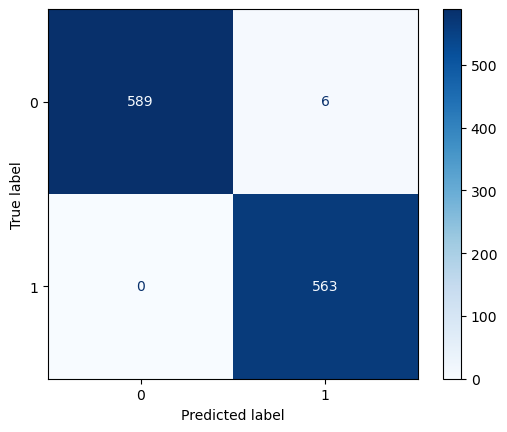

In [67]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(final_model, X_test, y_test, cmap='Blues', values_format='d')

***Report***
* ***The best Model is XGBoost Classifier with 99% accuracy and cost of 60***